# BUSINESS PROBLEM STATEMENT
- Assume you are working with MyBank. The Bank executed a campaign to cross-sell Personal Loans. As part of their Pilot Campaign, 20000 customers were sent campaigns through email, sms, and direct mail.
- They were given an offer of Personal Loan at an attractive interest rate of 12% and processing fee waived off if they respond within 1 Month. 
- 2512 customer expressed their interest and are marked as Target = 1
- Many Demographics and Behavioural variables provided. 
- You have to build a Model using Supervised Learning Technique to finds profitable segments to target for cross-selling personal loans. Make necessary assumptions where required.


# EDA

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
data_train=pd.read_csv('PL_XSELL.csv')

In [5]:
data_train.shape

(20000, 40)

In [6]:
data_train.head().T

,0,1,2,3,4
CUST_ID,C7927,C6877,C19922,C8183,C12123
TARGET,0,0,0,0,0
AGE,27,47,40,53,36
GENDER,M,M,M,M,M
BALANCE,3383.75,287489,18216.9,71720.5,1.67162e+06
OCCUPATION,SELF-EMP,SAL,SELF-EMP,SAL,PROF
AGE_BKT,26-30,46-50,36-40,>50,36-40
SCR,776,324,603,196,167
HOLDING_PERIOD,30,28,2,13,24
ACC_TYPE,SA,SA,SA,CA,SA


- since customer id and random number has no meaning we can drop those column

In [7]:
data_train=data_train.drop(['random','CUST_ID'],axis=1)

In [8]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x29219cec240>,
 [Text(-0.697966,0.850202,'M'),
  Text(0.672148,-0.870757,'F'),
  Text(1.0995,-0.0329975,'O')],
 [Text(-0.380709,0.463746,'71.9%'),
  Text(0.366626,-0.474958,'27.2%'),
  Text(0.59973,-0.0179986,'1.0%')])

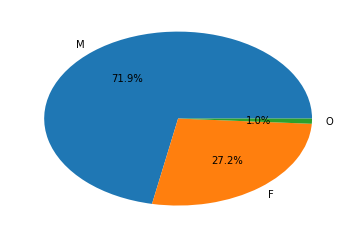

In [9]:
plt.pie(data_train['GENDER'].value_counts(),labels=data_train['GENDER'].value_counts().index,autopct='%1.1f%%')

- Above chart shows male account holders are high when compared to others

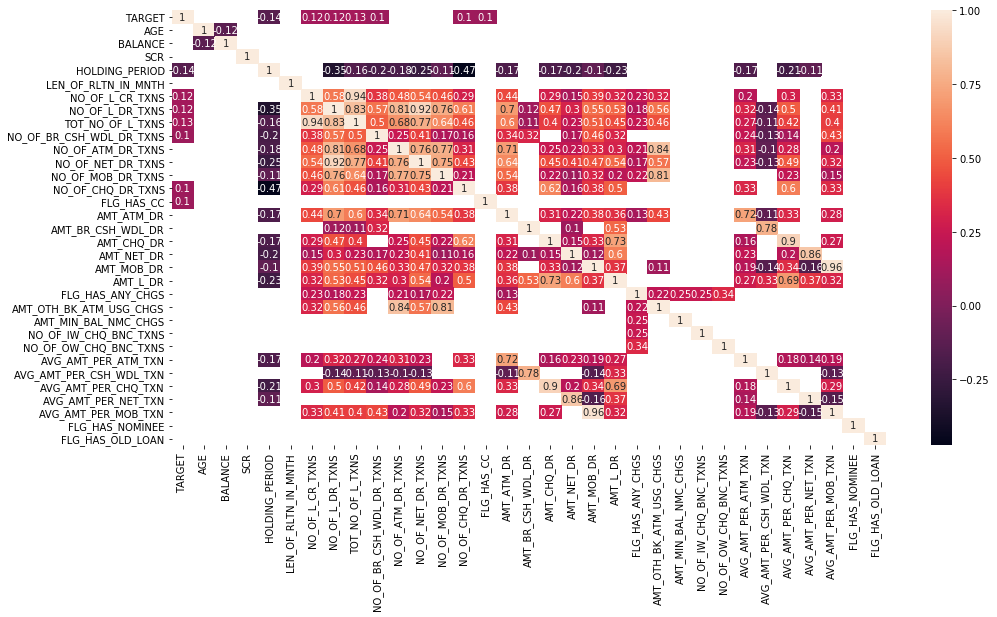

In [10]:
plt.subplots(figsize=(16,8))
sns.heatmap(data_train.corr()[data_train.corr().abs()>0.1],annot=True)

- From the above you can understand there is very small amount of correlation for target coumn with independent variable.
- Multi-collinearity exists 

In [11]:
# convert factors to labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_train['GENDER'] = le.fit_transform(data_train['GENDER'])
data_train['AGE_BKT'] = le.fit_transform(data_train['AGE_BKT'])
data_train['OCCUPATION'] = le.fit_transform(data_train['OCCUPATION'])
data_train['ACC_TYPE'] = le.fit_transform(data_train['ACC_TYPE'])
data_train['OCCUPATION'] = le.fit_transform(data_train['OCCUPATION'])

In [12]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 38 columns):
TARGET                      20000 non-null int64
AGE                         20000 non-null int64
GENDER                      20000 non-null int64
BALANCE                     20000 non-null float64
OCCUPATION                  20000 non-null int64
AGE_BKT                     20000 non-null int64
SCR                         20000 non-null int64
HOLDING_PERIOD              20000 non-null int64
ACC_TYPE                    20000 non-null int64
ACC_OP_DATE                 20000 non-null object
LEN_OF_RLTN_IN_MNTH         20000 non-null int64
NO_OF_L_CR_TXNS             20000 non-null int64
NO_OF_L_DR_TXNS             20000 non-null int64
TOT_NO_OF_L_TXNS            20000 non-null int64
NO_OF_BR_CSH_WDL_DR_TXNS    20000 non-null int64
NO_OF_ATM_DR_TXNS           20000 non-null int64
NO_OF_NET_DR_TXNS           20000 non-null int64
NO_OF_MOB_DR_TXNS           20000 non-null int64
NO_OF_

In [13]:
data_train['ACC_OP_DATE']=pd.to_datetime(data_train['ACC_OP_DATE'])

In [14]:
data_train['ACC_OP_YR']=data_train['ACC_OP_DATE'].dt.year

- age and age_bucket express same data

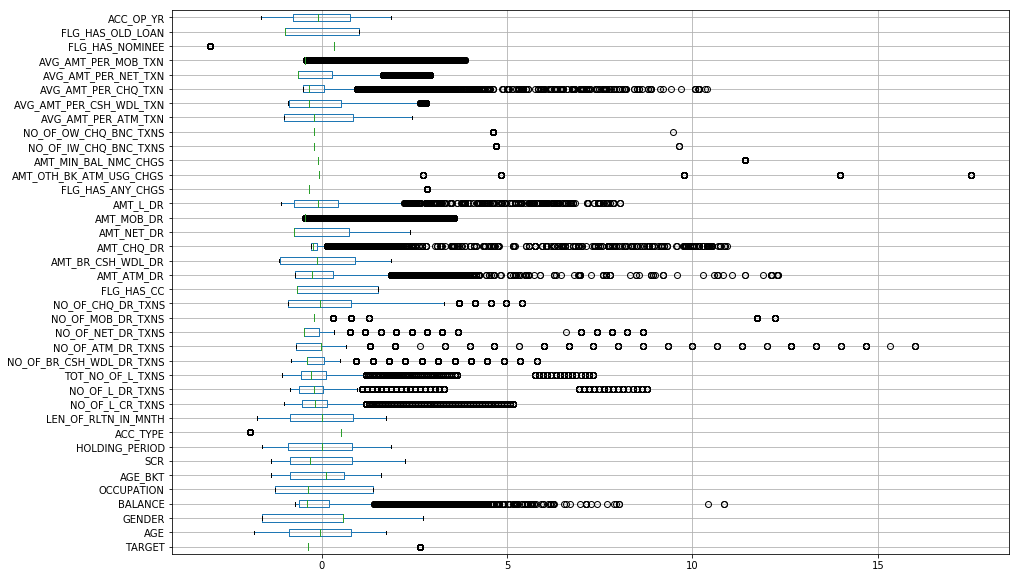

In [15]:
from sklearn.preprocessing import StandardScaler
x=data_train.drop(['ACC_OP_DATE'],axis=1)
scaler=StandardScaler().fit(x)
y=pd.DataFrame(scaler.transform(x),columns=x.columns)
y.boxplot(vert=False,figsize=(15,10))

- Many outliers are there except some column

In [16]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,20000.0,0.125600,0.331406,0.0,0.000,0.000,0.00,1.00
AGE,20000.0,38.418150,9.577985,21.0,30.000,38.000,46.00,55.00
GENDER,20000.0,0.737900,0.460993,0.0,0.000,1.000,1.00,2.00
BALANCE,20000.0,511362.192118,723592.961792,0.0,64754.025,231675.845,653876.85,8360430.57
OCCUPATION,20000.0,1.423550,1.141017,0.0,0.000,1.000,3.00,3.00
AGE_BKT,20000.0,2.759000,2.037137,0.0,1.000,3.000,4.00,6.00
SCR,20000.0,440.150300,249.887582,100.0,227.000,364.000,644.00,999.00
HOLDING_PERIOD,20000.0,14.955650,8.642634,1.0,7.000,15.000,22.00,31.00
ACC_TYPE,20000.0,0.787950,0.408770,0.0,1.000,1.000,1.00,1.00
LEN_OF_RLTN_IN_MNTH,20000.0,125.239300,54.953936,29.0,79.000,125.000,172.00,221.00


In [18]:
# Load libraries
from matplotlib import pyplot
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

C:\Users\DINESHKUMAR\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


- Feature Selection based on VIF

In [19]:
X=data_train.drop(['AGE','TARGET','ACC_OP_DATE'],axis=1)
Y=data_train[['TARGET']]

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_features = list(X)

x_features.remove('TOT_NO_OF_L_TXNS')
x_features.remove('ACC_OP_YR')


data_mat = X[x_features].as_matrix()
data_mat.shape
vif = [ variance_inflation_factor( data_mat,i) for i in range(data_mat.shape[1]) ]
vif_factors = pd.DataFrame()
vif_factors['column'] = list(x_features)
vif_factors['vif'] = vif
print(vif_factors)

                      column        vif
0                     GENDER   3.608270
1                    BALANCE   1.513460
2                 OCCUPATION   2.531924
3                    AGE_BKT   2.742947
4                        SCR   3.891427
5             HOLDING_PERIOD   5.082247
6                   ACC_TYPE   6.568642
7        LEN_OF_RLTN_IN_MNTH   5.620225
8            NO_OF_L_CR_TXNS   4.395184
9            NO_OF_L_DR_TXNS        inf
10  NO_OF_BR_CSH_WDL_DR_TXNS        inf
11         NO_OF_ATM_DR_TXNS        inf
12         NO_OF_NET_DR_TXNS        inf
13         NO_OF_MOB_DR_TXNS        inf
14         NO_OF_CHQ_DR_TXNS        inf
15                FLG_HAS_CC   1.436352
16                AMT_ATM_DR        inf
17         AMT_BR_CSH_WDL_DR        inf
18                AMT_CHQ_DR        inf
19                AMT_NET_DR        inf
20                AMT_MOB_DR        inf
21                  AMT_L_DR        inf
22          FLG_HAS_ANY_CHGS   1.632028
23   AMT_OTH_BK_ATM_USG_CHGS   9.296511


In [21]:
X=data_train[x_features]
validation_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [22]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'
# Spot-Check Algorithms
models = []
models.append(('Logistic', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('GB',GradientBoostingClassifier()))

In [23]:
# evaluate each model in turn
results = []
names = []
model_comp=pd.DataFrame(columns=['Model','Test Accuracy','Std.Dev'])
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    model_comp=model_comp.append([{'Model':name, 'Test Accuracy':cv_results.mean(), 'Std.Dev':cv_results.std()}],ignore_index=True)
    
model_comp

,Model,Test Accuracy,Std.Dev
0,Logistic,0.872214,0.007467
1,KNN,0.874857,0.009803
2,CART,0.933214,0.005961
3,GB,0.880000,0.008978


In [24]:
model=DecisionTreeClassifier(max_depth=15)
model=model.fit(X_train,Y_train)
model.score(X_train,Y_train)

0.9642857142857143

In [25]:
model.score(X_validation,Y_validation)

0.9161666666666667

- the model is underfit,so regularization is done to become best model

In [26]:
model=DecisionTreeClassifier(max_depth=5)
model=model.fit(X_train,Y_train)
model.score(X_train,Y_train)

0.8809285714285714

In [27]:
model.score(X_validation,Y_validation)

0.8801666666666667

In [30]:
from IPython.display import Image  
from sklearn import tree
from os import system

train_char_label = ['yes', 'no']
Loan_campaign_File = open('Loan_campaign_tree.dot','w')
dot_data = tree.export_graphviz(model, out_file=Loan_campaign_File, feature_names = list(X), class_names = list(train_char_label))

Loan_campaign_File.close()


# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X.columns).sort_values(by='Imp',ascending=False))

                               Imp
NO_OF_L_DR_TXNS           0.135141
OCCUPATION                0.104135
NO_OF_L_CR_TXNS           0.096786
BALANCE                   0.082433
SCR                       0.078672
AMT_L_DR                  0.078112
FLG_HAS_CC                0.076634
HOLDING_PERIOD            0.066566
GENDER                    0.048056
NO_OF_NET_DR_TXNS         0.036628
NO_OF_OW_CHQ_BNC_TXNS     0.034653
LEN_OF_RLTN_IN_MNTH       0.033081
AMT_MOB_DR                0.031893
AVG_AMT_PER_NET_TXN       0.028763
AMT_CHQ_DR                0.019563
AMT_ATM_DR                0.017793
AVG_AMT_PER_CSH_WDL_TXN   0.017154
AVG_AMT_PER_ATM_TXN       0.013934
AVG_AMT_PER_CHQ_TXN       0.000000
AMT_MIN_BAL_NMC_CHGS      0.000000
AVG_AMT_PER_MOB_TXN       0.000000
FLG_HAS_NOMINEE           0.000000
NO_OF_IW_CHQ_BNC_TXNS     0.000000
AMT_BR_CSH_WDL_DR         0.000000
AMT_OTH_BK_ATM_USG_CHGS   0.000000
FLG_HAS_ANY_CHGS          0.000000
AMT_NET_DR                0.000000
NO_OF_CHQ_DR_TXNS   

- To Create tree diagram,use this link https://dreampuf.github.io/GraphvizOnline/
- Open .dot file generated and copy it in this url, you will get the tree diagram

!['Tree-digram'](download.png)

- Because I have given max_depth=5 only five levels are there(exclude the root)
- Feature selection used for Decision Tree is based on the model importance variables